In [95]:
from sklearn import datasets
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

IRIS
-------
Import the data:

In [119]:
irisData = datasets.load_iris()['data']
class1 = irisData[0:50]
class2 = irisData[50:100]
class3 = irisData[100:150]
classes = [class1, class2, class3]

Extract the training and testing data for the different classes: 

In [85]:


target1 = np.array(([1],[0],[0]))
target2 = np.array(([0],[1],[0]))
target3 = np.array(([0],[0],[1]))
target = [target1, target2, target3]


In order to classify the data we need to define the sigmoid function:

In [ ]:
def sigmoid(X):
    return 1/(1+np.exp(-X))

The training is done by minimizing the mean square error of the classifier.  The MSE is given by:

$
MSE = \frac{1}{2}\sum_{k=1}^{N} (g_k - t_k)^T(g_k-t_k)
$

t_k is the true classification of each $x_k$ and $g_k = Wx_k$. W is a weighting matrix for the differnte values in the vector x. This the only tweakable parameter and thus, in order to minimize the MSE, we need to find the gradient of the MSE with respect to W and update W with a step size, $\alpha$ times the gradient. This is done many times iterativly.


Defining some parameters for the trainging of the classifier:

Defining the weighting matrix and the target data, $t_k$:

In [187]:
def trainingClassifier(numIterations, alpha, training):
    F = len(training[0][0]) # Number of features
    C = len(training)  # Number of classes
    N = len(training[0]) # Number of samples for each training set

    W = np.zeros((C, F))
    w_0 = np.zeros((C, 1))
    W = np.concatenate((W, w_0), axis=1)

    for _ in range(numIterations):
        W_prev = W
        grad_MSE = np.zeros((3,F+1))
        for k in range(len(training[0])):
                for x, tk in zip(training, target):
                        xk = np.append(x[k], 1)
                        xk = xk.reshape(F+1, 1)
                        gk = sigmoid(W@xk)
                        temp = np.multiply(gk-tk, gk)
                        temp = np.multiply(temp, (1-gk))
                        grad_MSE += temp@xk.T
                W = W_prev - alpha*grad_MSE
    return W

def confusionMatrix(W, samples, figureNum):
        C = len(testing)        
        confusion = np.zeros((C,C))
        for k in range(C):
                for x in samples[k]:
                        xk = np.append(x, 1)
                        gk = sigmoid(W@xk)
                        gk = gk.reshape(C, 1)
                        label = np.argmax(gk, axis=0)
                        confusion[label,k] += 1
        plt.figure(figureNum)
        sn.heatmap(confusion, annot = True)
        return confusion

[[ 0.47634677  1.91393657 -2.83266824 -1.31996294  0.33918248]
 [ 1.47023033 -3.27371558 -0.38061997 -0.83132013  2.93378896]
 [-3.65447327 -3.31456931  5.45645995  5.21745229 -3.12216263]]
[[30.  0.  0.]
 [ 0. 28.  0.]
 [ 0.  2. 30.]]
[[30.  0.  0.]
 [ 0. 28.  0.]
 [ 0.  2. 30.]]


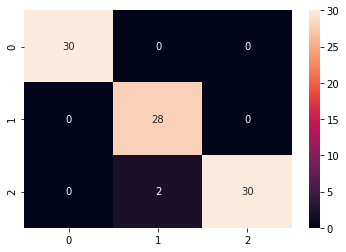

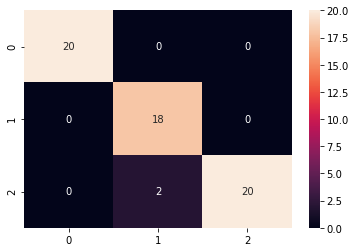

In [188]:
numIterations = 5000 # Number of iterations
alpha = 0.01 # Step length
F = len(features) # Number of features
C = len(classes)  # Number of classes
N = len(training[0]) # Number of samples for each training set

training1 = class1[0:30]
training2 = class2[0:30]
training3 = class3[0:30]
training = [training1, training2, training3]

testing1 = class1[30:50]
testing2 = class2[30:50]
testing3 = class3[30:50]
testing = [testing1, testing2, testing3]

W = np.zeros((C, F))
w_0 = np.zeros((C, 1))
W = np.concatenate((W, w_0), axis=1)

W = trainingClassifier(numIterations, alpha, training)
print(W)

confusionTraining = confusionMatrix(W, training, 1)
print(confusionTesting)
confusionTesting = confusionMatrix(W, testing, 2)
print(confusionTraining)


Switching to have 20 samples for training and 30 for testing. Otherwise using the same setup. 

[[ 0.4779267   1.70833342 -2.64920429 -1.23615024  0.30516393]
 [ 1.06230591 -2.52936723 -0.02852197 -1.15758604  2.19517865]
 [-3.56942007 -2.30338122  4.67003325  4.79283445 -2.25377002]]
[[20.  0.  0.]
 [ 0. 18.  0.]
 [ 0.  2. 20.]]
[[20.  0.  0.]
 [ 0. 19.  0.]
 [ 0.  1. 20.]]


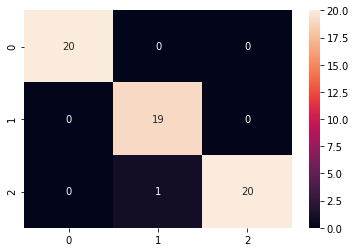

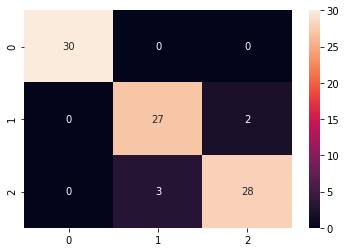

In [189]:

training1 = class1[0:20]
training2 = class2[0:20]
training3 = class3[0:20]
training = [training1, training2, training3]

testing1 = class1[20:50]
testing2 = class2[20:50]
testing3 = class3[20:50]
testing = [testing1, testing2, testing3]

W = trainingClassifier(numIterations, alpha, training)
print(W)

confusionTraining = confusionMatrix(W, training, 1)
print(confusionTesting)
confusionTesting = confusionMatrix(W, testing, 2)
print(confusionTraining)


Produce histogra for each feature and class:

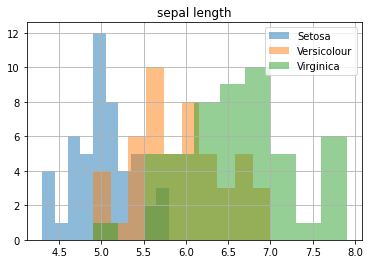

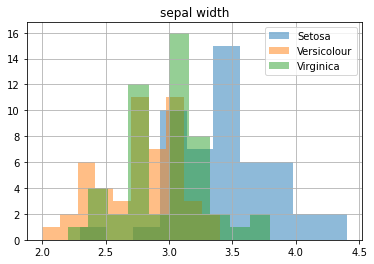

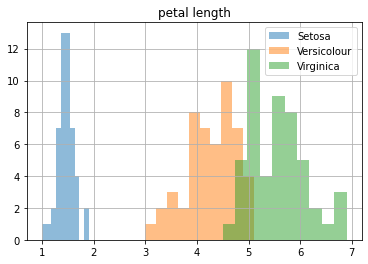

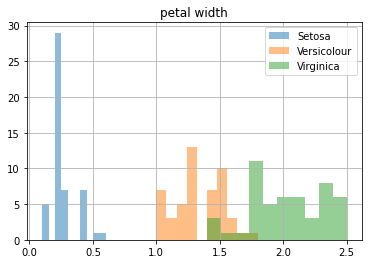

In [129]:
 def feature_name(f):
    if f == 0: return "sepal length"
    if f == 1: return "sepal width"
    if f == 2: return "petal length"
    if f == 3: return "petal width"
 
 features = np.array([0,1,2,3])
 for f in features:
        plt.figure(f)
        plt.hist(class1[:,f], alpha=0.5, label = "Setosa")
        plt.hist(class2[:,f], alpha=0.5, label = "Versicolour")
        plt.hist(class3[:,f], alpha=0.5, label = "Virginica")
        plt.legend()
        plt.grid()
        plt.title(feature_name(f))
    
for c in classes:
        plt.figures

Removing the feature with most overlap, feature two, sepal width. Training and testing with the remaining features:
-----------

[[ 1.87898325 -3.53924511 -1.70750973  0.74495669]
 [-0.77385174  1.67020891 -2.79903124  0.87943649]
 [-4.56216891  5.36967877  3.93841885 -4.23244027]]
[[20.  0.  0.]
 [ 0. 19.  2.]
 [ 0.  1. 18.]]
[[30.  0.  0.]
 [ 0. 28.  1.]
 [ 0.  2. 29.]]


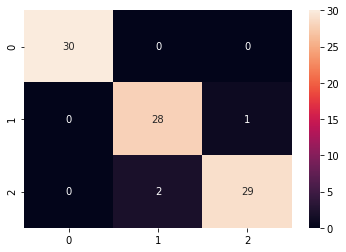

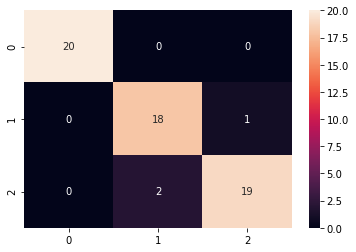

In [197]:

training1 = np.delete(class1[0:30], 1, axis=1)
training2 = np.delete(class2[0:30], 1, axis=1)
training3 = np.delete(class3[0:30], 1, axis=1)
training = [training1, training2, training3]


testing1 = np.delete(class1[30:50], 1, axis=1)
testing2 = np.delete(class2[30:50], 1, axis=1)
testing3 = np.delete(class3[30:50], 1, axis=1)
testing = [testing1, testing2, testing3]

W = trainingClassifier(numIterations, alpha, training)
print(W)

confusionTraining = confusionMatrix(W, training, 1)
print(confusionTesting)
confusionTesting = confusionMatrix(W, testing, 2)
print(confusionTraining)

Now removing the feature with second most overlap:
---------------

[[ -1.85169357  -2.76758928   6.7583004 ]
 [  1.20785785  -2.43823096  -2.30518299]
 [  0.70693131   5.08857984 -11.88853772]]
[[20.  0.  0.]
 [ 0. 18.  1.]
 [ 0.  2. 19.]]
[[30.  0.  0.]
 [ 0. 27.  2.]
 [ 0.  3. 28.]]


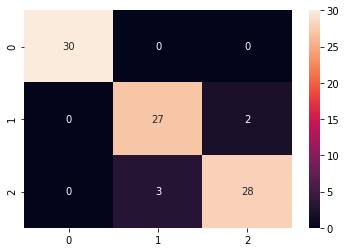

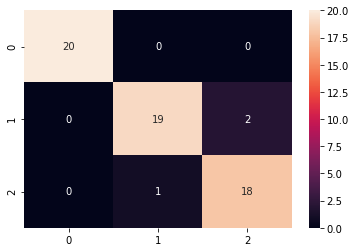

In [198]:
training1 = np.delete(class1[0:30], [0,1], axis=1)
training2 = np.delete(class2[0:30], [0,1], axis=1)
training3 = np.delete(class3[0:30], [0,1], axis=1)
training = [training1, training2, training3]


testing1 = np.delete(class1[30:50], [0,1], axis=1)
testing2 = np.delete(class2[30:50], [0,1], axis=1)
testing3 = np.delete(class3[30:50], [0,1], axis=1)
testing = [testing1, testing2, testing3]

W = trainingClassifier(numIterations, alpha, training)
print(W)

confusionTraining = confusionMatrix(W, training, 1)
print(confusionTesting)
confusionTesting = confusionMatrix(W, testing, 2)
print(confusionTraining)

Lastly we try with only the feature with the least amount of overlap:
---------

[[ -7.14132641   5.10320492]
 [  0.28349235  -1.02429884]
 [  6.52527236 -10.77858361]]
[[20.  0.  0.]
 [ 0. 18.  2.]
 [ 0.  2. 18.]]
[[30.  0.  0.]
 [ 0. 27.  1.]
 [ 0.  3. 29.]]


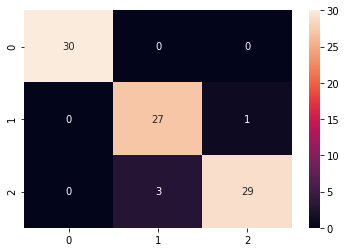

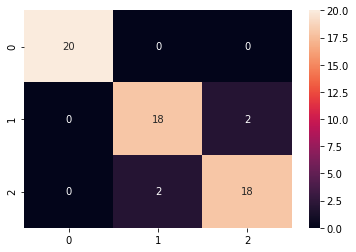

In [204]:
training1 = np.delete(class1[0:30], [0,1,2], axis=1)
training2 = np.delete(class2[0:30], [0,1,2], axis=1)
training3 = np.delete(class3[0:30], [0,1,2], axis=1)
training = [training1, training2, training3]

testing1 = np.delete(class1[30:50], [0,1,2], axis=1)
testing2 = np.delete(class2[30:50], [0,1,2], axis=1)
testing3 = np.delete(class3[30:50], [0,1,2], axis=1)
testing = [testing1, testing2, testing3]

W = trainingClassifier(numIterations, alpha, training)
print(W)

confusionTraining = confusionMatrix(W, training, 1)
print(confusionTesting)
confusionTesting = confusionMatrix(W, testing, 2)
print(confusionTraining)